# Program: Coursera Python for Everybody Specialization 
Course #4: Using Databases with Python

Created: December 2020

@author: Steven Ponce


## Week 2 Assignment – Our First Database

Instructions
If you don't already have it, install the SQLite Browser from http://sqlitebrowser.org/.

Then, create a SQLITE database or use an existing database and create a table in the database called "Ages":

CREATE TABLE Ages ( 
  name VARCHAR(128), 
  age INTEGER
)

Then make sure the table is empty by deleting any rows that you previously inserted, and insert these rows and only these rows with the following commands:

DELETE FROM Ages;
INSERT INTO Ages (name, age) VALUES ('Alessandra', 13);
INSERT INTO Ages (name, age) VALUES ('Reggie', 18);
INSERT INTO Ages (name, age) VALUES ('Clove', 32);
INSERT INTO Ages (name, age) VALUES ('Joanne', 14);
INSERT INTO Ages (name, age) VALUES ('Kacey', 37);
INSERT INTO Ages (name, age) VALUES ('Titi', 24);

Once the inserts are done, run the following SQL command:
SELECT hex(name || age) AS X FROM Ages ORDER BY X

Find the first row in the resulting record set and enter the long string that looks like 53656C696E613333.


Create Table Ages

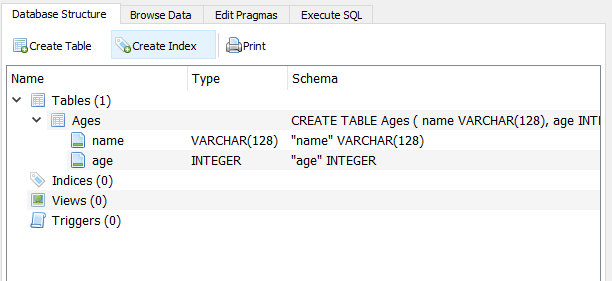


Empty Table

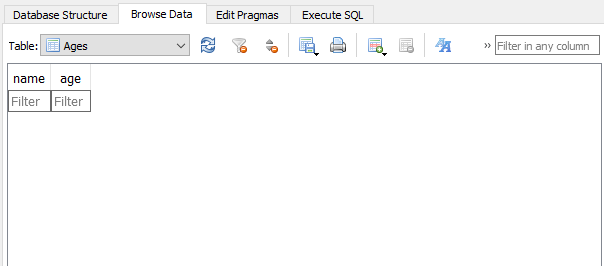

Adding rows to the table

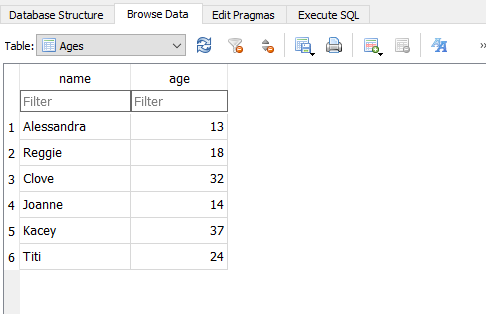

Running the following SQL command: 

SELECT hex(name || age) AS X FROM Ages ORDER BY X

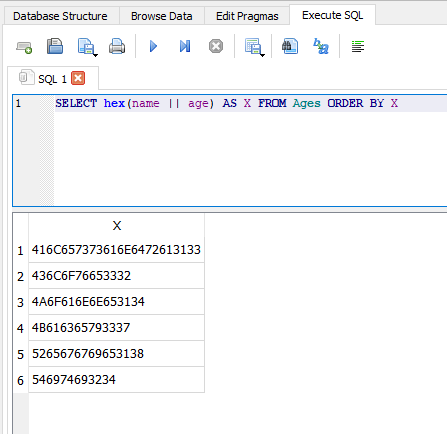

## Week 2 Assignment – Counting Email in a Database

To get credit for this assignment, perform the instructions below and upload your SQLite3 database here:
(Must have a .sqlite suffix)

Hint: The top organizational count is 536.

You do not need to export or convert the database - simply upload the .sqlite file that your program creates. See the example code for the use of the connect() statement.

### Counting Organizations
This application will read the mailbox data (mbox.txt) and count the number of email messages per organization (i.e. domain name of the email address) using a database with the following schema to maintain the counts.

CREATE TABLE Counts (org TEXT, count INTEGER)
When you have run the program on mbox.txt upload the resulting database file above for grading.
If you run the program multiple times in testing or with dfferent files, make sure to empty out the data before each run.

You can use this code as a starting point for your application: http://www.py4e.com/code3/emaildb.py.

The data file for this application is the same as in previous assignments: http://www.py4e.com/code3/mbox.txt.

Because the sample code is using an UPDATE statement and committing the results to the database as each record is read in the loop, it might take as long as a few minutes to process all the data. The commit insists on completely writing all the data to disk every time it is called.

The program can be speeded up greatly by moving the commit operation outside of the loop. In any database program, there is a balance between the number of operations you execute between commits and the importance of not losing the results of operations that have not yet been committed.

In [ ]:
import sqlite3

# connecting to the file
conn = sqlite3.connect('counting_emaildb.sqlite')
cur = conn.cursor()

# delete any previous table
cur.execute('DROP TABLE IF EXISTS Counts')

# create new table
cur.execute('''
CREATE TABLE Counts (org TEXT, count INTEGER)''')                          

# user input file name
fname = input('Enter file name: ')
if (len(fname) < 1): fname = 'mbox.txt'
fh = open(fname)

# reading ea line and splitting into name and org
for line in fh:
    if not line.startswith('From: '): continue
    pieces = line.split()
    email = pieces[1]
    domain = email.find('@')
    org = email[domain+1:len(email)]
    
    
# Updating the table                                                         
    cur.execute('SELECT count FROM Counts WHERE org = ? ', (org,))    
    row = cur.fetchone()                                                
    
    if row is None:
        cur.execute('''INSERT INTO Counts (org, count)
                VALUES (?, 1)''', (org,))
    else:
        cur.execute('UPDATE Counts SET count = count + 1 WHERE org = ?',     
                    (org,))
                                                                 

# top 10 results
sqlstr = 'SELECT org, count FROM Counts ORDER BY Count DESC LIMIT 10'       

for row in cur.execute(sqlstr):
    print(str(row[0]), row[1])

# commit the changes and close connection    
conn.commit()       
cur.close()                                                                    


### Code Output

Enter file name: mbox.txt

iupui.edu 536

umich.edu 491

indiana.edu 178

caret.cam.ac.uk 157

vt.edu 110

uct.ac.za 96

media.berkeley.edu 56

ufp.pt 28

gmail.com 25

et.gatech.edu 17


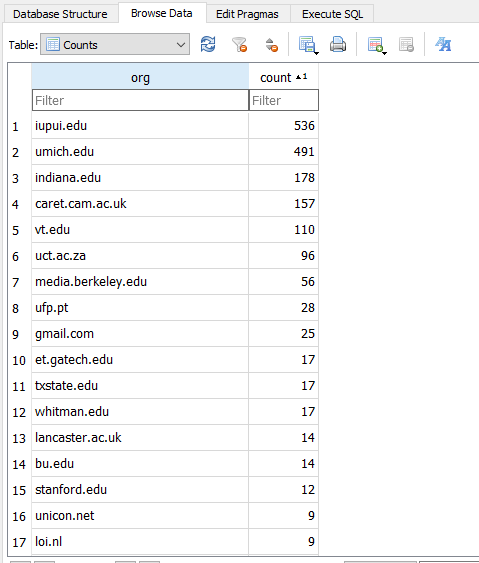